## Intoduction

#### Nesse dataset vamos trabalhar com dois objetivos:

#####  1- Prever o Tipo de Veículo Elétrico:

Variável-Alvo: Electric Vehicle Type (BEV ou PHEV).
Objetivo: Desenvolver um modelo que possa prever se um veículo é exclusivamente elétrico (BEV) ou um híbrido plug-in (PHEV) com base em suas características.

##### 2 - Identificar Padrões de Adoção de Carros Elétricos por Distrito Legislativo:

Variável-Alvo: Pode ser a presença de carros elétricos em um determinado distrito legislativo.
Objetivo: Analisar como a adoção de carros elétricos varia em diferentes distritos legislativos, o que pode estar relacionado a políticas locais.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score

In [2]:
eletric= pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [3]:
eletric.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2C4RC1N71H,Kitsap,Bremerton,WA,98311.0,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,23.0,349437882,POINT (-122.6466274 47.6341188),PUGET SOUND ENERGY INC,5.303509e+10
1,2C4RC1N7XL,Stevens,Colville,WA,99114.0,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,7.0,154690532,POINT (-117.90431 48.547075),AVISTA CORP,5.306595e+10
2,KNDC3DLCXN,Yakima,Yakima,WA,98908.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,14.0,219969144,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA0J,Kitsap,Bainbridge Island,WA,98110.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,476786887,POINT (-122.5235781 47.6293323),PUGET SOUND ENERGY INC,5.303509e+10
4,1N4AZ1CP7J,Thurston,Tumwater,WA,98501.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,35.0,201185253,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
eletric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159467 entries, 0 to 159466
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         159467 non-null  object 
 1   County                                             159463 non-null  object 
 2   City                                               159463 non-null  object 
 3   State                                              159467 non-null  object 
 4   Postal Code                                        159463 non-null  float64
 5   Model Year                                         159467 non-null  int64  
 6   Make                                               159467 non-null  object 
 7   Model                                              159467 non-null  object 
 8   Electric Vehicle Type                              159467 non-null  object

In [5]:
eletric.shape


(159467, 17)

In [6]:
eletric.isnull().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 361
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

In [7]:
eletric.duplicated().sum()

0

In [8]:
eletric.nunique().sum()

174461

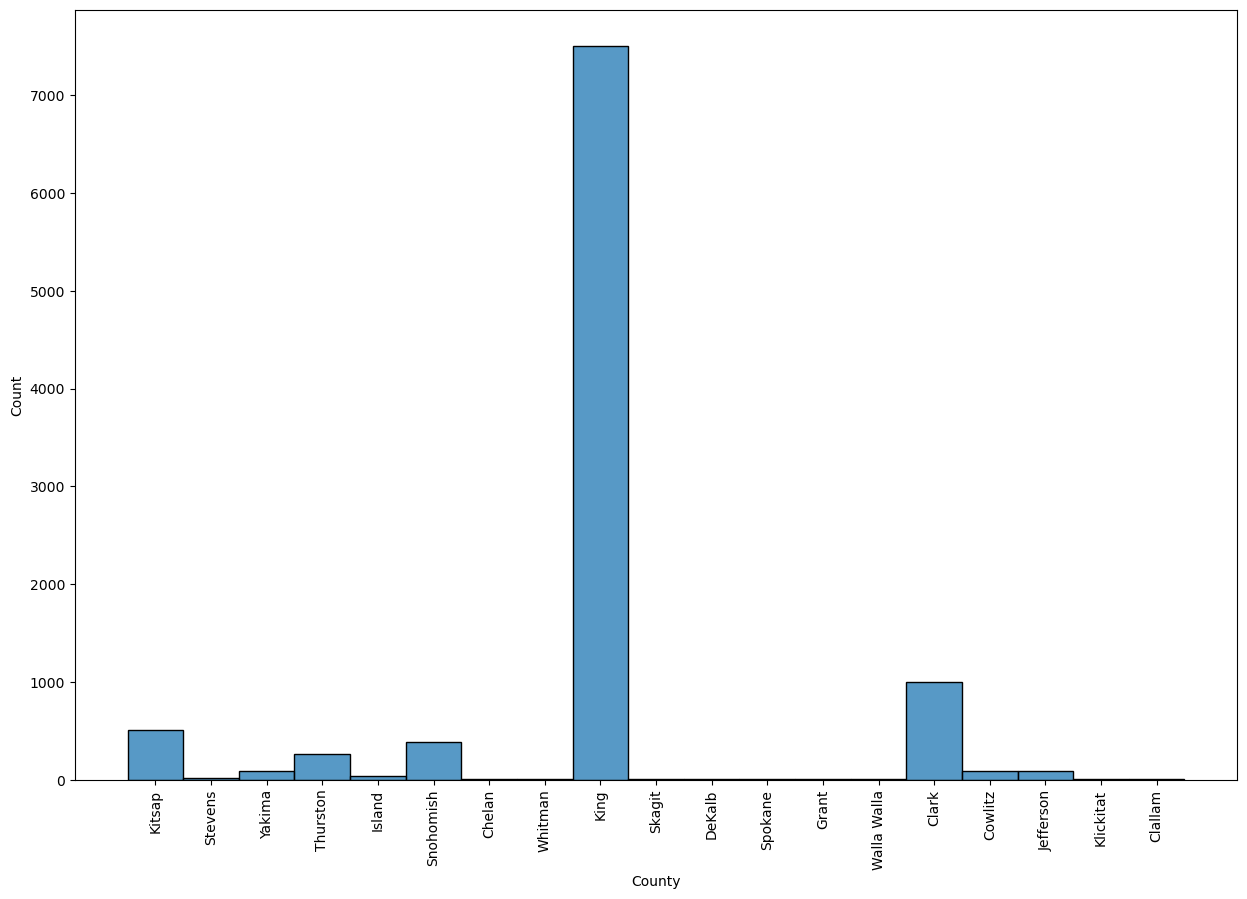

In [9]:
plt.figure(figsize=(15 , 10 ))
sns.histplot(eletric['County'][0:10000])
plt.xticks(rotation ="vertical")
plt.show()

In [10]:
eletric['Base MSRP'].value_counts()

0         156043
69900       1430
31950        392
52900        217
32250        147
54950        129
59900        129
39995        117
36900        101
44100         94
45600         85
64950         84
33950         72
52650         69
34995         65
36800         56
55700         50
53400         36
98950         21
110950        21
81100         20
90700         20
102000        16
75095         12
184400        10
43700         10
89100          6
109000         6
91250          5
32995          3
845000         1
Name: Base MSRP, dtype: int64

In [11]:
eletric.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,159463.000000,159467.000000,159467.000000,159467.00000,159106.000000,1.594670e+05,1.594630e+05
mean,98170.373635,2020.192510,64.283319,1227.63716,29.261675,2.140242e+08,5.297287e+10
std,2453.354932,3.010564,94.634277,8930.03468,14.843878,7.959275e+07,1.621526e+09
min,1730.000000,1997.000000,0.000000,0.00000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.00000,18.000000,1.731016e+08,5.303301e+10
50%,98122.000000,2021.000000,14.000000,0.00000,33.000000,2.198450e+08,5.303303e+10
75%,98370.000000,2023.000000,84.000000,0.00000,43.000000,2.448363e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.00000,49.000000,4.792548e+08,5.603300e+10


In [12]:
media_base_msrp = eletric['Base MSRP'].mean()
print(f"A média dos valores na coluna 'Base MSRP' é: {media_base_msrp}")

A média dos valores na coluna 'Base MSRP' é: 1227.6371600393811


In [13]:
eletric['Electric Range'].value_counts()

0      77195
215     6359
220     4063
84      3965
25      3752
       ...  
95         3
74         3
11         2
59         1
57         1
Name: Electric Range, Length: 102, dtype: int64

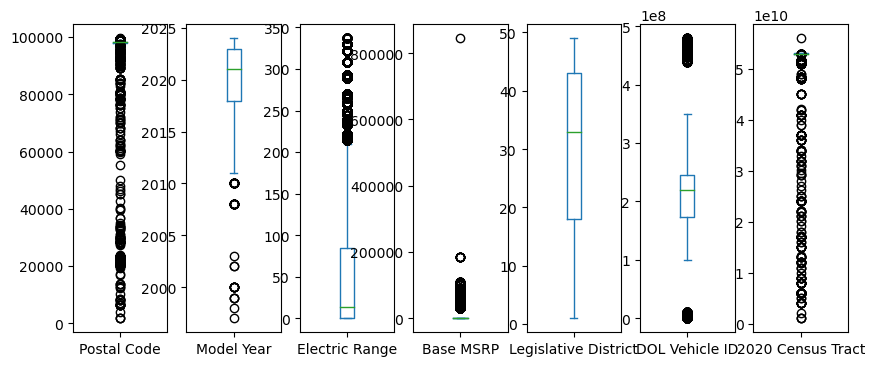

In [14]:
eletric.plot(kind='box', figsize=(10,4),subplots=True);

In [15]:
total_zeros = (eletric == 0).sum().sum()
print(f"O número total de zeros no conjunto de dados é: {total_zeros}")

O número total de zeros no conjunto de dados é: 233238


In [16]:
eletric.shape

(159467, 17)

In [17]:
zeros_por_coluna = eletric.eq(0).sum()

# Exibindo o resultado
print("Número de zeros por coluna:")
print(zeros_por_coluna)

Número de zeros por coluna:
VIN (1-10)                                                0
County                                                    0
City                                                      0
State                                                     0
Postal Code                                               0
Model Year                                                0
Make                                                      0
Model                                                     0
Electric Vehicle Type                                     0
Clean Alternative Fuel Vehicle (CAFV) Eligibility         0
Electric Range                                        77195
Base MSRP                                            156043
Legislative District                                      0
DOL Vehicle ID                                            0
Vehicle Location                                          0
Electric Utility                                          0
2020 Census 

In [18]:
eletric['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Eligibility unknown as battery range has not been researched    77195
Clean Alternative Fuel Vehicle Eligible                         63824
Not eligible due to low battery range                           18448
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

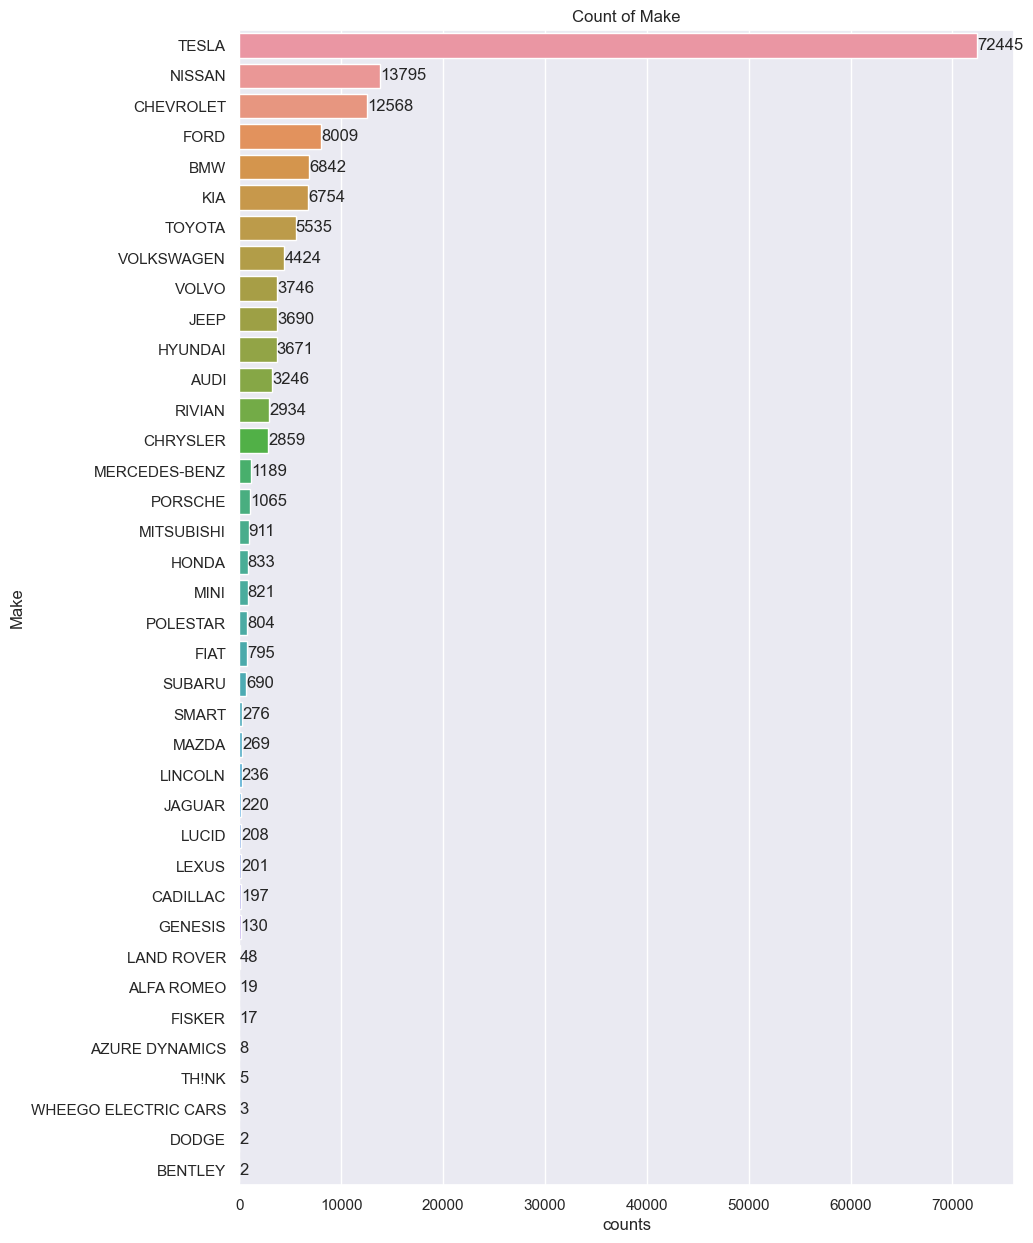

In [19]:
sns.set(rc={"figure.figsize":(10,15)})
ax = sns.barplot(data=eletric.groupby(by='Make').size().reset_index(name="counts").sort_values('counts', ascending=False), 
              y='Make', x='counts')
ax.set(title="Count of Make") # title barplot

# label each bar in barplot
for p in ax.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    # adding text to each bar
    ax.text(x = width+5, # x-coordinate position of data label, padded 5 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = "{:.0f}".format(width), # data label, formatted to ignore decimals
    va = "center") # sets vertical alignment (va) to center
    

# Volkswagen is by far the top manufacturer among total 55 companies, in terms of numbers of cars in this dataset.

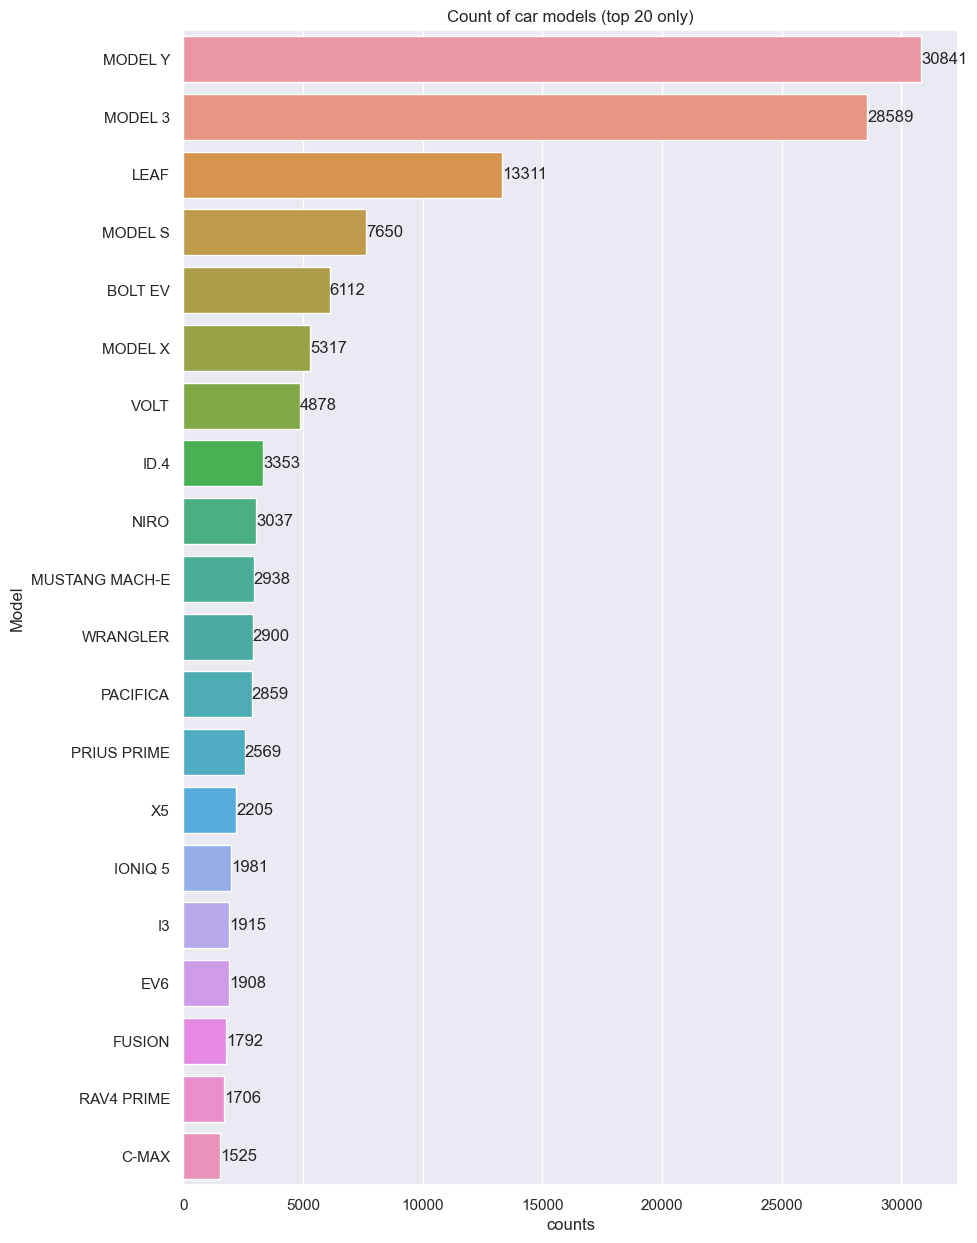

In [20]:
sns.set(rc={"figure.figsize":(10,15)})
ax = sns.barplot(data=eletric.groupby(by='Model').size().reset_index(name="counts").sort_values('counts', ascending=False).head(20), 
              y='Model', x='counts')
ax.set(title="Count of car models (top 20 only)") # title barplot

# label each bar in barplot
for p in ax.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    # adding text to each bar
    ax.text(x = width+5, # x-coordinate position of data label, padded 5 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = "{:.0f}".format(width), # data label, formatted to ignore decimals
    va = "center") # sets vertical alignment (va) to center
    

# Volkswagen is mainly represented by Passat and Golf, whereas Opel from Astra and Vectra.

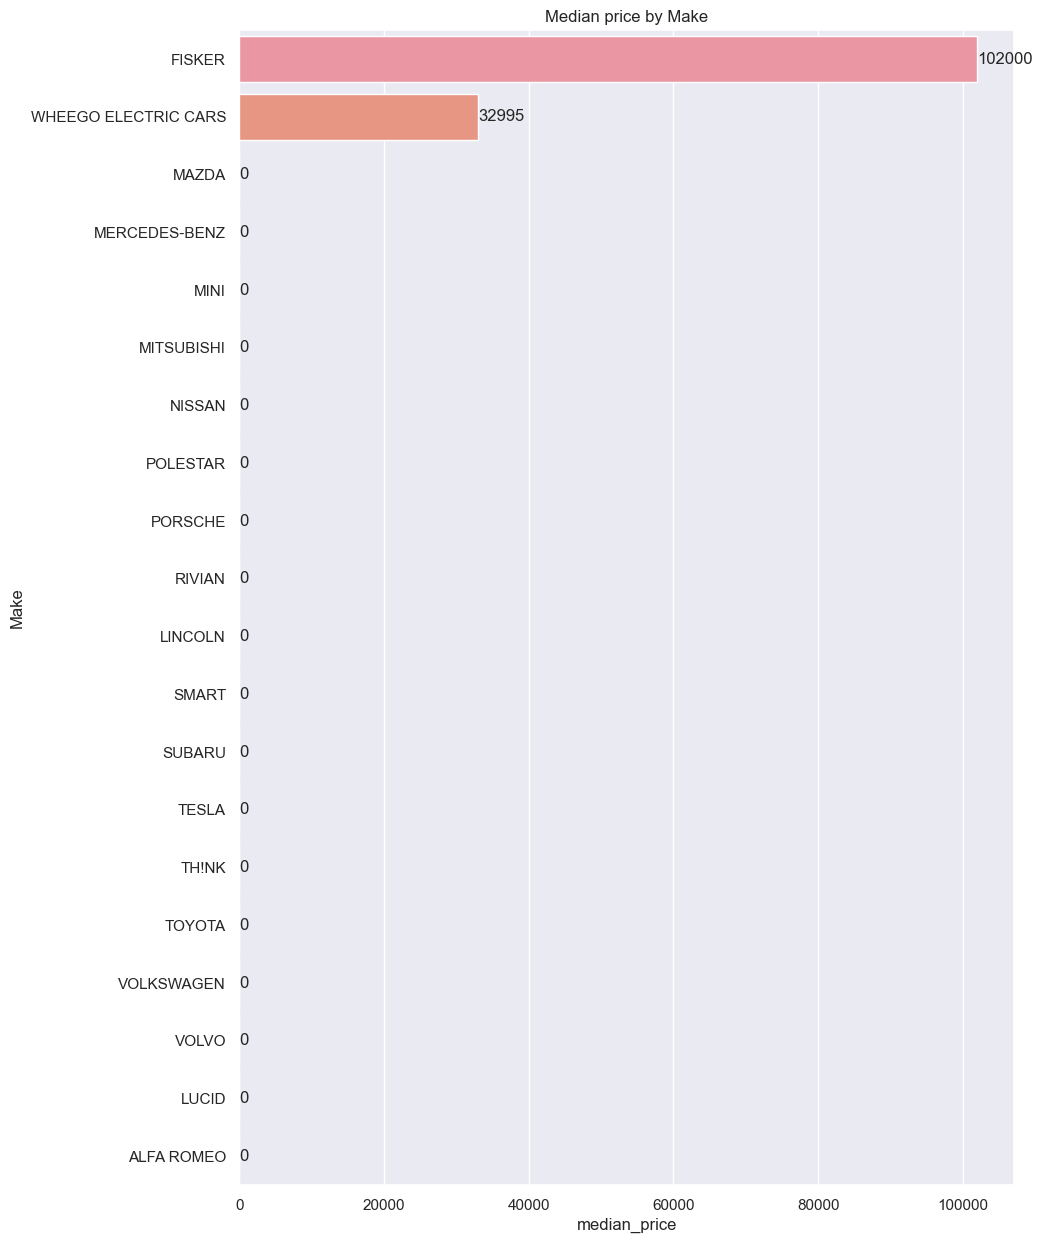

In [21]:
sns.set(rc={"figure.figsize":(10,15)})
ax = sns.barplot(data=eletric.groupby(by='Make')['Base MSRP'].median().reset_index(name="median_price").sort_values('median_price', ascending=False).head(20), 
              y='Make', x='median_price')
ax.set(title="Median price by Make") # title barplot

# label each bar in barplot
for p in ax.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    # adding text to each bar
    ax.text(x = width+5, # x-coordinate position of data label, padded 5 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = "{:.0f}".format(width), # data label, formatted to ignore decimals
    va = "center") # sets vertical alignment (va) to center
    

# This plot is more informative, because it creates a distinction between expensive and more affordable manufacturers based on the median price (more robust metric to outliers than mean).

In [22]:
eletric['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            124153
Plug-in Hybrid Electric Vehicle (PHEV)     35314
Name: Electric Vehicle Type, dtype: int64

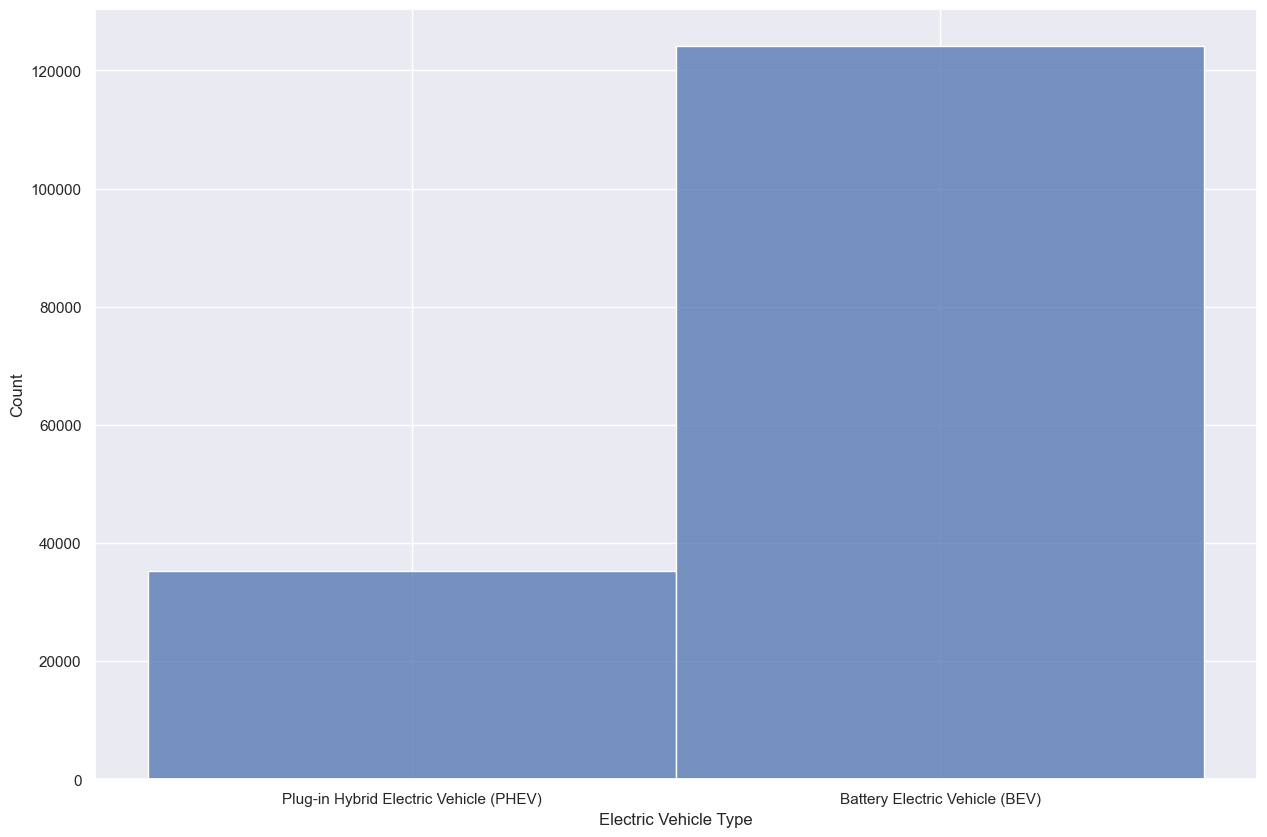

In [23]:
plt.figure(figsize=(15,10))
sns.histplot(eletric['Electric Vehicle Type'])
plt.show()

In [24]:
eletric['Model Year'].value_counts()

2023    45244
2022    27680
2021    18737
2018    14328
2020    11394
2019    10730
2017     8576
2016     5604
2015     4897
2013     4516
2014     3561
2024     1714
2012     1645
2011      780
2010       24
2008       21
2000        8
1999        3
2002        2
1998        1
1997        1
2003        1
Name: Model Year, dtype: int64

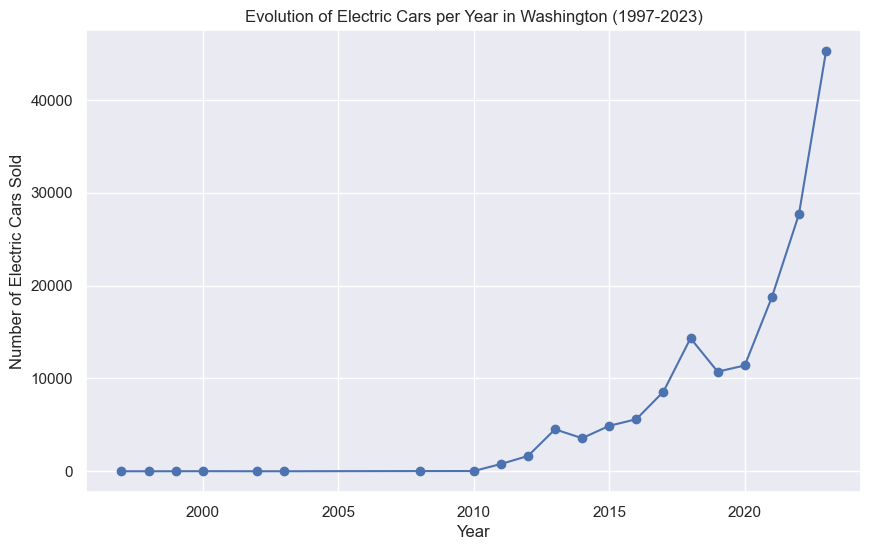

In [25]:
import matplotlib.pyplot as plt

# Assume 'eletric' is the name of your DataFrame
# Make sure you have imported the pandas library and loaded the data correctly

# Filter data until 2023
eletric_until_2023 = eletric[eletric['Model Year'] <= 2023]

# Count of electric cars by year
count_per_year = eletric_until_2023['Model Year'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(count_per_year.index, count_per_year.values, marker='o', linestyle='-')

# Adding labels and title
plt.title('Evolution of Electric Cars per Year in Washington (1997-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Electric Cars Sold')

# Display the plot
plt.grid(True)
plt.show()

In [26]:
eletric['Legislative District'].value_counts()

41.0    10447
45.0     9639
48.0     8856
1.0      6909
36.0     6785
5.0      6742
11.0     6309
46.0     6274
43.0     6033
37.0     4743
34.0     4670
18.0     4274
44.0     4080
21.0     3944
22.0     3903
32.0     3865
40.0     3492
23.0     3488
33.0     3274
26.0     3151
47.0     2869
10.0     2758
31.0     2739
17.0     2700
39.0     2321
27.0     2247
42.0     2209
35.0     2201
24.0     2196
49.0     2154
28.0     2088
30.0     1900
2.0      1756
8.0      1649
25.0     1633
38.0     1518
12.0     1445
6.0      1442
20.0     1393
4.0      1307
13.0     1080
29.0     1065
14.0     1007
19.0      927
9.0       891
16.0      806
3.0       776
7.0       764
15.0      387
Name: Legislative District, dtype: int64

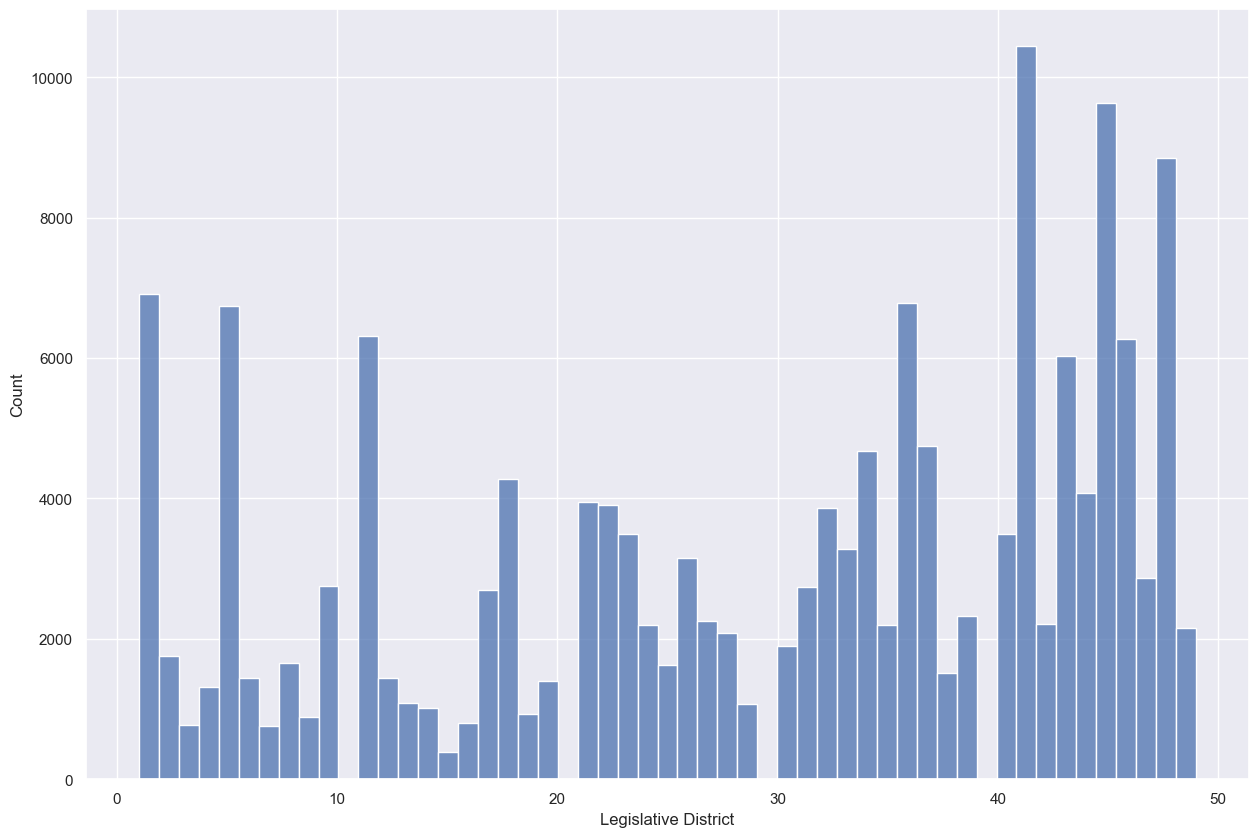

In [27]:
plt.figure(figsize=(15,10))
sns.histplot(eletric['Legislative District'])
plt.show()

In [28]:
eletric.tail(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
159457,WMW13DJ02N,Pierce,Gig Harbor,WA,98335.0,2022,MINI,HARDTOP,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,26.0,157404628,POINT (-122.5835454 47.3234488),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
159458,WVGUNPE25M,Pierce,Fircrest,WA,98466.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,28.0,186009491,POINT (-122.537565 47.231645),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
159459,1G1RA6S5XJ,King,Bellevue,WA,98006.0,2018,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53,0,41.0,111632055,POINT (-122.16937 47.571015),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
159460,2C4RC1S72P,Benton,Kennewick,WA,99338.0,2023,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,8.0,257601732,POINT (-119.1973001 46.1911488),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF B...,5.300501e+10
159461,7SAYGDEF4P,Thurston,Olympia,WA,98516.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,22.0,254707820,POINT (-122.7474291 47.0821119),PUGET SOUND ENERGY INC,5.306701e+10
159462,KM8JBDA2XP,Skamania,Underwood,WA,98651.0,2023,HYUNDAI,TUCSON,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,14.0,235949514,POINT (-121.5312858 45.7348285),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF S...,5.305995e+10
159463,1G1FZ6S02M,Skagit,Bow,WA,98232.0,2021,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,40.0,148544168,POINT (-122.440636 48.5613885),PUGET SOUND ENERGY INC,5.305795e+10
159464,YV4H60CX2P,King,Sammamish,WA,98029.0,2023,VOLVO,XC90,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,5.0,240200754,POINT (-121.9993659 47.5484866),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
159465,5YJ3E1EA7K,Whatcom,Bellingham,WA,98225.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,40.0,156680590,POINT (-122.486115 48.761615),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
159466,7SAYGDEF6N,Island,Camano Island,WA,98282.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,10.0,208285619,POINT (-122.5310901 48.2192797),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.302997e+10


##### This code is creating a bar plot using Seaborn to visualize the count of electric cars in the top 50 counties. It labels each bar with the corresponding count and provides an interpretation related to the main representations in County King.

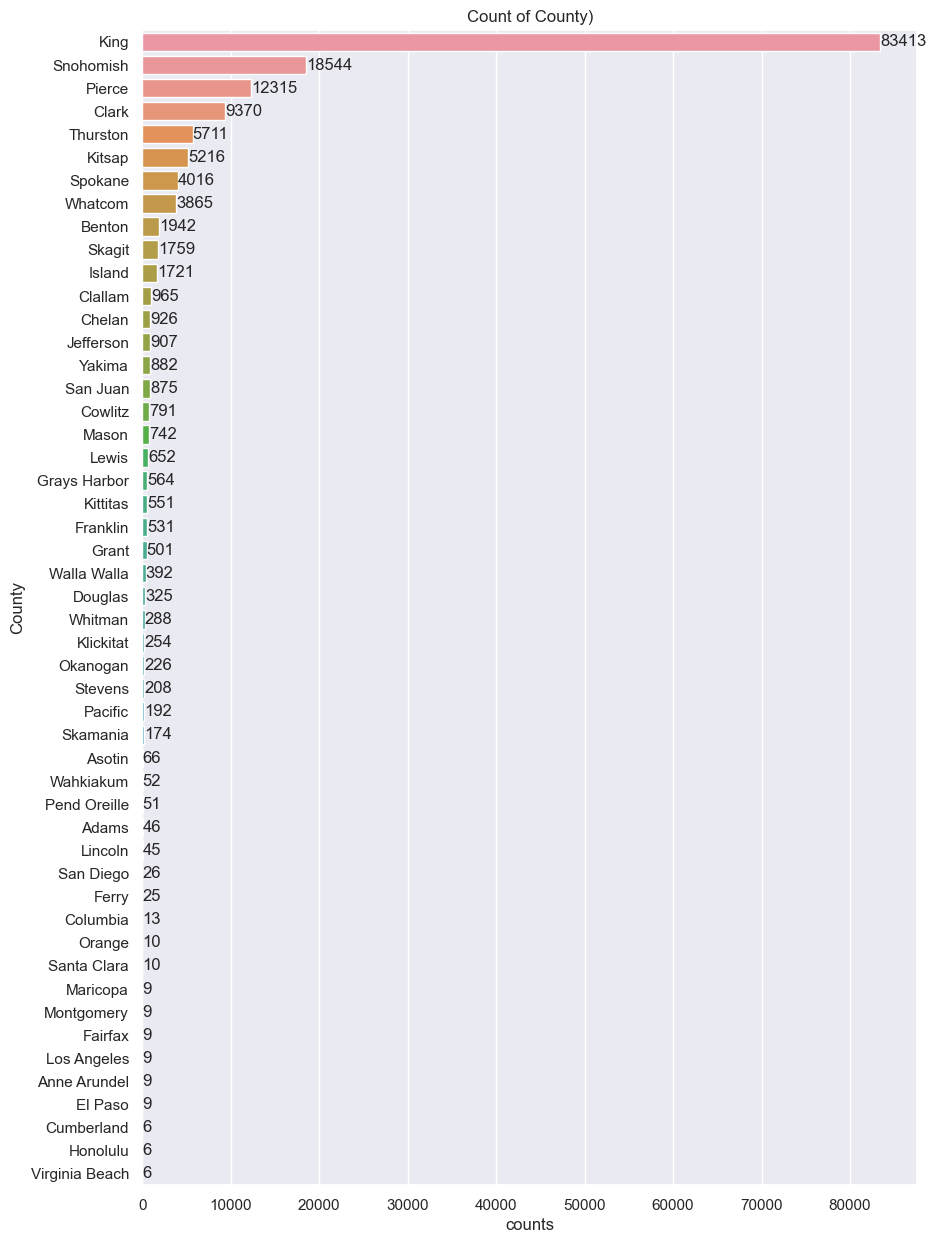

In [29]:
sns.set(rc={"figure.figsize":(10,15)})
ax = sns.barplot(data=eletric.groupby(by='County').size().reset_index(name="counts").sort_values('counts', ascending=False).head(50), 
              y='County', x='counts')
ax.set(title="Count of County)") # title barplot

# label each bar in barplot
for p in ax.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    # adding text to each bar
    ax.text(x = width+5, # x-coordinate position of data label, padded 5 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = "{:.0f}".format(width), # data label, formatted to ignore decimals
    va = "center") # sets vertical alignment (va) to center
    



In [30]:
# Identificar linhas com valores nulos na coluna 'Legislative District'
linhas_nulas = eletric[eletric['Legislative District'].isnull()]

# Exibir as linhas com valores nulos
print(linhas_nulas)

        VIN (1-10)          County          City State  Postal Code  \
53      1N4AZ0CP0F          DeKalb       Decatur    GA      30030.0   
71      5YJ3E1EA5K             NaN           NaN    BC          NaN   
49984   7FCTGAAA2N        Monterey       Seaside    CA      93955.0   
57467   WA11AAGE5P            Lake  Libertyville    IL      60048.0   
58982   7SAYGAEE8N            Hoke       Raeford    NC      28376.0   
...            ...             ...           ...   ...          ...   
158499  5YJSA1DP5D           Clark     Las Vegas    NV      89131.0   
158657  5YJXCBE51M         Harnett   Spring Lake    NC      28390.0   
158687  5YJ3E1EB9N  San Bernardino    Fort Irwin    CA      92310.0   
158713  7SAYGDEE8N        Stafford      Stafford    VA      22554.0   
158816  1G1RC6S55H        Berkeley   Summerville    SC      29486.0   

        Model Year       Make    Model  \
53            2015     NISSAN     LEAF   
71            2019      TESLA  MODEL 3   
49984         2022   

In [31]:
# Tente converter a coluna 'Legislative District' para números
eletric['Legislative District'] = pd.to_numeric(eletric['Legislative District'], errors='coerce')

# Identificar linhas com valores não numéricos
linhas_nao_numericas = eletric[eletric['Legislative District'].isnull()]
print(linhas_nao_numericas)

        VIN (1-10)          County          City State  Postal Code  \
53      1N4AZ0CP0F          DeKalb       Decatur    GA      30030.0   
71      5YJ3E1EA5K             NaN           NaN    BC          NaN   
49984   7FCTGAAA2N        Monterey       Seaside    CA      93955.0   
57467   WA11AAGE5P            Lake  Libertyville    IL      60048.0   
58982   7SAYGAEE8N            Hoke       Raeford    NC      28376.0   
...            ...             ...           ...   ...          ...   
158499  5YJSA1DP5D           Clark     Las Vegas    NV      89131.0   
158657  5YJXCBE51M         Harnett   Spring Lake    NC      28390.0   
158687  5YJ3E1EB9N  San Bernardino    Fort Irwin    CA      92310.0   
158713  7SAYGDEE8N        Stafford      Stafford    VA      22554.0   
158816  1G1RC6S55H        Berkeley   Summerville    SC      29486.0   

        Model Year       Make    Model  \
53            2015     NISSAN     LEAF   
71            2019      TESLA  MODEL 3   
49984         2022   

In [32]:
eletric.isnull().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 361
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

In [33]:
eletric.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2C4RC1N71H,Kitsap,Bremerton,WA,98311.0,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,23.0,349437882,POINT (-122.6466274 47.6341188),PUGET SOUND ENERGY INC,5.303509e+10
1,2C4RC1N7XL,Stevens,Colville,WA,99114.0,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,7.0,154690532,POINT (-117.90431 48.547075),AVISTA CORP,5.306595e+10
2,KNDC3DLCXN,Yakima,Yakima,WA,98908.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,14.0,219969144,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA0J,Kitsap,Bainbridge Island,WA,98110.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,476786887,POINT (-122.5235781 47.6293323),PUGET SOUND ENERGY INC,5.303509e+10
4,1N4AZ1CP7J,Thurston,Tumwater,WA,98501.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,35.0,201185253,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [34]:
# Remover linhas com valores não numéricos na coluna 'Legislative District'
eletric = eletric[eletric['Legislative District'].notnull()]

# ou

# Substituir valores não numéricos por um valor específico (por exemplo, 0)
eletric['Legislative District'] = pd.to_numeric(eletric['Legislative District'], errors='coerce').fillna(0)

C:\Users\erito\AppData\Local\Temp\ipykernel_11192\913275049.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eletric['Legislative District'] = pd.to_numeric(eletric['Legislative District'], errors='coerce').fillna(0)


In [35]:
# Identificar linhas com valores nulos na coluna 'Legislative District'
linhas_nulas = eletric[eletric['Legislative District'].isnull()]

# Exibir as linhas com valores nulos
print(linhas_nulas)

Empty DataFrame
Columns: [VIN (1-10), County, City, State, Postal Code, Model Year, Make, Model, Electric Vehicle Type, Clean Alternative Fuel Vehicle (CAFV) Eligibility, Electric Range, Base MSRP, Legislative District, DOL Vehicle ID, Vehicle Location, Electric Utility, 2020 Census Tract]
Index: []


In [36]:
# Tente converter a coluna 'Legislative District' para números
eletric['Legislative District'] = pd.to_numeric(eletric['Legislative District'], errors='coerce')

# Identificar linhas com valores não numéricos
linhas_nao_numericas = eletric[eletric['Legislative District'].isnull()]
print(linhas_nao_numericas)

Empty DataFrame
Columns: [VIN (1-10), County, City, State, Postal Code, Model Year, Make, Model, Electric Vehicle Type, Clean Alternative Fuel Vehicle (CAFV) Eligibility, Electric Range, Base MSRP, Legislative District, DOL Vehicle ID, Vehicle Location, Electric Utility, 2020 Census Tract]
Index: []


C:\Users\erito\AppData\Local\Temp\ipykernel_11192\1787788610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eletric['Legislative District'] = pd.to_numeric(eletric['Legislative District'], errors='coerce')


In [37]:
eletric.shape

(159106, 17)

Now we are going to execute PCA Model in order to reduce the curse of dimensionality to avoid in this case, specially two things: Computational Complexity -As algorithms need to work exponentially harder as the number of dimensions increases. Increased Sparsity: As dimensions increase, data points become more distant from each other, reducing data density and creating more space between them within the dimensions.
and
Overfitting: The risk of a model capturing random noise as meaningful patterns, particularly when the number of features approaches or exceeds the number of observations.

But there is a challenge, our dataset is based on string (text), in order to run PCA we need to drop these columns or which is more appropriate in this case, handle all categorial values to numeric representation. We learned two different approach to do it on class, one-hot-encoder and label enconder, we are going to use both, depending on the column details, binario or categorical.

In [38]:
columns = eletric.columns
print(columns)

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


In [39]:
column_types = eletric.dtypes
print(column_types)

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

Based on columns type above, we can use label enconding approach to all columns type float64 and int64 and one-hot enconding to columns type object.

In [40]:
# Seleção das colunas numéricas para label encoding
numeric_columns = ['Model Year', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
                   'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Postal Code',
                   '2020 Census Tract']

# Label encoding para as colunas numéricas
label_encoder = LabelEncoder()
for col in numeric_columns:
    eletric[col] = label_encoder.fit_transform(eletric[col])

# Seleção das colunas categóricas para one-hot encoding
categorical_columns = ['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Vehicle Location', 'Electric Utility']

# One-hot encoding para as colunas categóricas
eletric_encoded = pd.get_dummies(eletric[categorical_columns])

# Concatenar as variáveis categóricas codificadas com as variáveis numéricas
eletric_final = pd.concat([eletric[numeric_columns], eletric_encoded], axis=1)

# Amostragem de 20% do conjunto de dados
eletric_final_sampled = eletric_final.sample(frac=0.2, random_state=42)

# Padronizar as variáveis
scaler = StandardScaler()
eletric_final_scaled = scaler.fit_transform(eletric_final_sampled)

C:\Users\erito\AppData\Local\Temp\ipykernel_11192\1121404190.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eletric[col] = label_encoder.fit_transform(eletric[col])
C:\Users\erito\AppData\Local\Temp\ipykernel_11192\1121404190.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eletric[col] = label_encoder.fit_transform(eletric[col])
C:\Users\erito\AppData\Local\Temp\ipykernel_11192\1121404190.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [41]:
# Aplicar o PCA com um número menor de componentes
pca = PCA(n_components=10)  # Escolha o número de componentes desejado
eletric_pca = pca.fit_transform(eletric_final_scaled)

# Visualizar a variância explicada cumulativa
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance:", cumulative_explained_variance)

Cumulative Explained Variance: [0.00084897 0.00156478 0.00219986 0.00279681 0.00338532 0.00397036
 0.00454848 0.00512497 0.00569787 0.00626981]


Neste caso, o primeiro componente principal explica aproximadamente 0.085% da variância total dos dados, o segundo componente principal explica cerca de 0.171%, e assim por diante. O décimo componente principal explica cerca de 0.63%.

Para avaliar se isso é "bom" ou "ruim", é uma questão de contexto e requisitos específicos do problema. Em geral, quanto maior a porcentagem de variância explicada pelos primeiros componentes principais, melhor, pois significa que esses componentes capturam uma quantidade significativa de informações dos dados originais.

Neste caso, os primeiros componentes principais explicam uma quantidade relativamente muito pequena da variância total. Isso nos indica que os padrões dos nossos dados são complexos e não podem ser totalmente capturados por um número pequeno de componentes principais. Ou seja, os dados podem ter uma estrutura mais complicada que não pode ser bem representada por um PCA com um número pequeno de componentes.

A porcentagem de variância explicada pelos primeiros componentes principais não atendem às nossas necessidades, nós poderiamos considerar aumentar o número de componentes principais, mas esbarramos no uso excessivo de memória que inviabiliou usar 100% do dataset após tentar rodar o PCA + One-hot-encoding para colunas binárias e label_enconding para colunas categóricas afim de converter string em número.

Vamos continuar com a análise do trablho rodando 2 tecnicas de machine learning, mas dado o problema anterior no PCA, não estamos seguros a respeito da acuracidade dos resultados. Vamos descobrir a seguir.

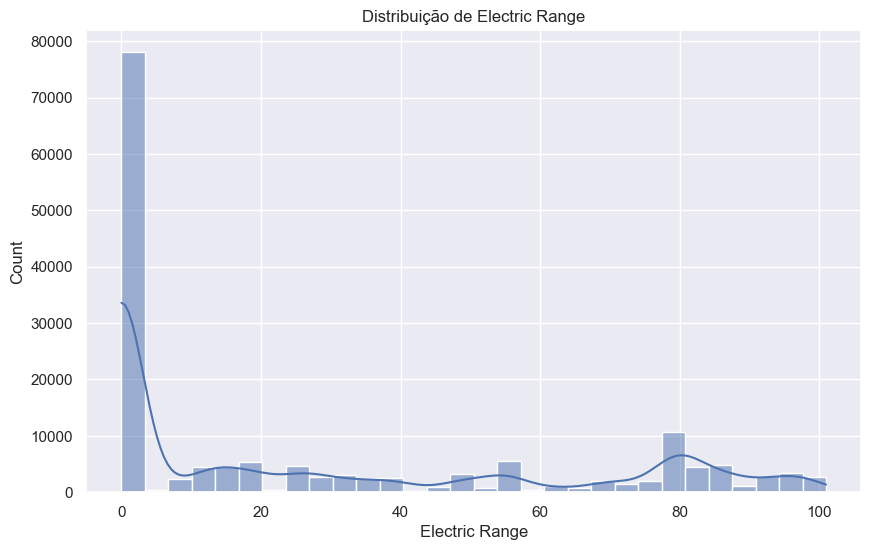

In [42]:
# Histograma para variável Electric Range
plt.figure(figsize=(10, 6))
sns.histplot(eletric['Electric Range'], bins=30, kde=True)
plt.title('Distribuição de Electric Range')
plt.show()

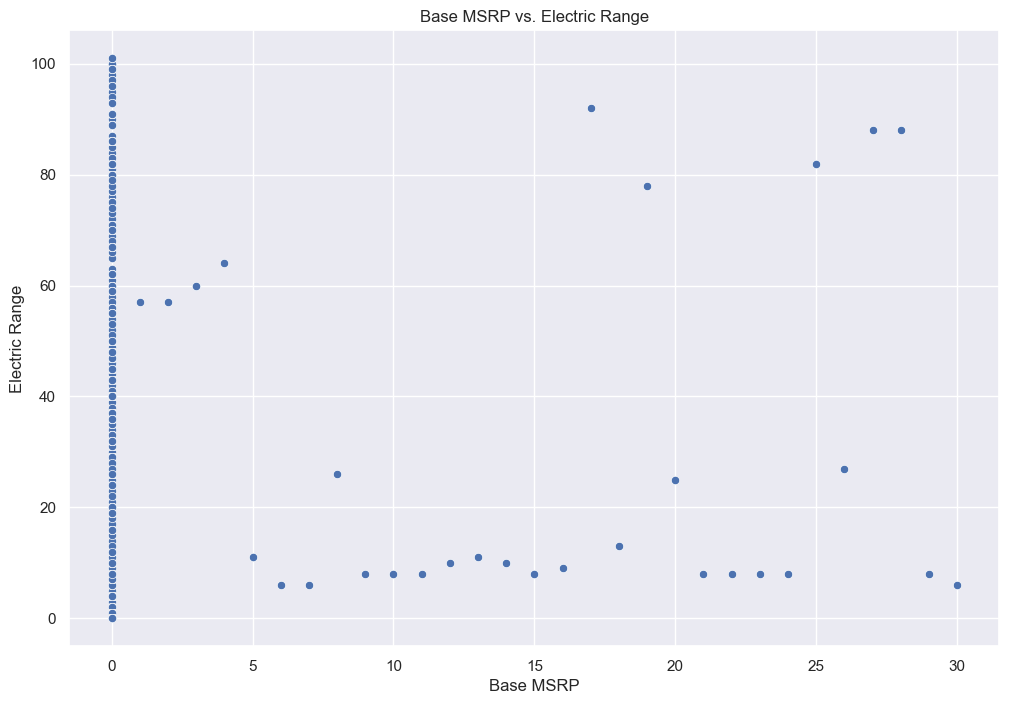

In [43]:
# Scatter plot para Base MSRP vs. Electric Range
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Base MSRP', y='Electric Range', data=eletric)
plt.title('Base MSRP vs. Electric Range')
plt.show()

In [44]:
# Verificar nulos
print(eletric.isnull().sum())


VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     5
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [45]:
#Pré-processamento dos Dados:
#Vamos tratar as 5 variáveis nulas da coluna "Vehicle Location" e aplicar codificação one-hot-encoding para variáveis categóricas.
# Tratar variáveis nulas
eletric = eletric.dropna(subset=['Electric Range', 'Base MSRP'])
eletric = eletric.fillna(0)  # Preencher nulos com 0 para variáveis numéricas

In [46]:
# Verificar nulos após o tratamento
print(eletric.isnull().sum())

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector as selector

# Selecionar colunas relevantes
eletric = eletric[['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model',
                   'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
                   'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
                   'Vehicle Location', 'Electric Utility', '2020 Census Tract']]

# Converter todas as colunas para string
eletric = eletric.astype(str)

# Criar pipeline para pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), selector(dtype_exclude="object")),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), selector(dtype_include="object"))
    ])

# Aplicar pré-processamento
eletric_processed = preprocessor.fit_transform(eletric)